# Los MiserAIbles Team

### Integrantes
Sorany Hincapie Salazar  
Brayan Montoya Osorio

## Exploración de los datos

In [3]:
import pandas as pd

path_to_data = '../data/challenge_data-18-ago.csv'

df = pd.read_csv(path_to_data, sep = ';')
df.head(10)

,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological
5,Effects of suprofen on the isolated perfused r...,Although suprofen has been associated with the...,hepatorenal
6,atherosclerosis and lymphoma: vascular insights,Aim: To investigate aspirin effects on diabete...,cardiovascular
7,Potential therapeutic use of the selective dop...,The clinical utility of dopamine (DA) D1 recep...,neurological
8,The basal ganglia connection in epilepsy,Background: dementia affects cardiac patients ...,neurological
9,septum and peripheral artery disease: vascular...,Purpose: This observational study examined cal...,cardiovascular


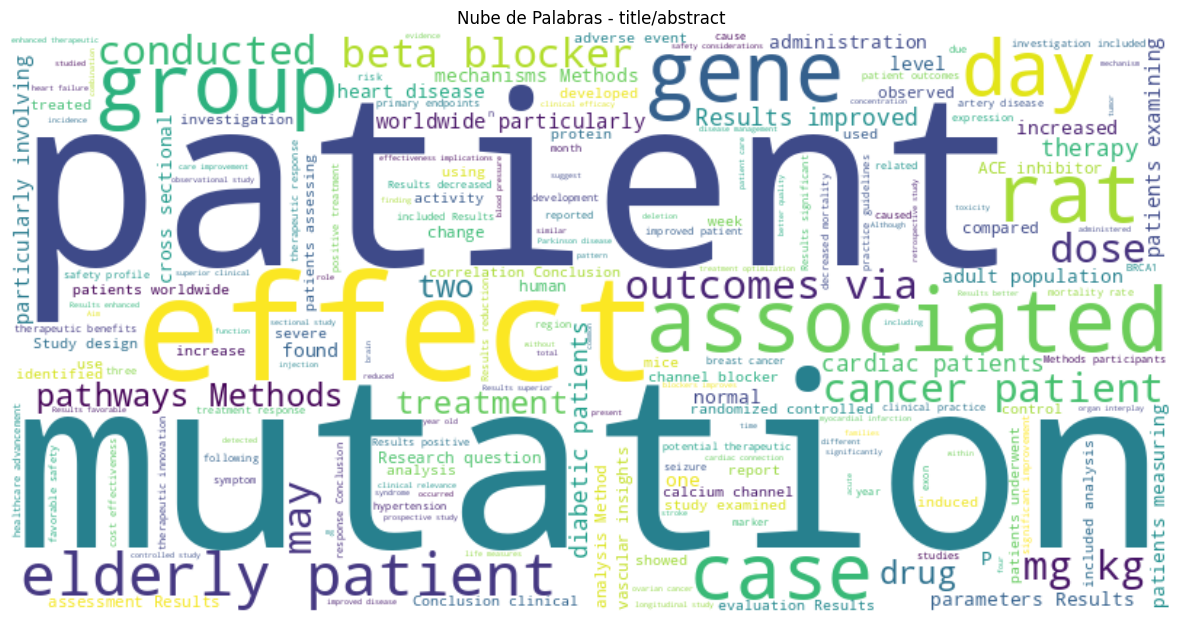

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
texto=df['title']+" " +df['abstract']
text = " ".join(word for word in texto)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - title/abstract")
plt.show()

## Extracción de características con NLP

Pasos:
1. Tokenización.
2. Limpieza.
3. Lemmatización.
4. Filtrado de StopWords.
5. Vectorización a través de TF-IDF.

### Ejemplo de prueba con un registro del dataset siguiendo los pasos anteriores.

In [4]:
row_example =  df.iloc[0]['title'] + ' ' +  df.iloc[0]['abstract']
print(row_example)

Adrenoleukodystrophy: survey of 303 cases: biochemistry, diagnosis, and therapy. Adrenoleukodystrophy ( ALD ) is a genetically determined disorder associated with progressive central demyelination and adrenal cortical insufficiency . All affected persons show increased levels of saturated unbranched very-long-chain fatty acids , particularly hexacosanoate ( C26  0 ) , because of impaired capacity to degrade these acids . This degradation normally takes place in a subcellular organelle called the peroxisome , and ALD , together with Zellwegers cerebrohepatorenal syndrome , is now considered to belong to the newly formed category of peroxisomal disorders . Biochemical assays permit prenatal diagnosis , as well as identification of most heterozygotes . We have identified 303 patients with ALD in 217 kindreds . These patients show a wide phenotypic variation . Sixty percent of patients had childhood ALD and 17 % adrenomyeloneuropathy , both of which are X-linked , with the gene mapped to X

### 1. Tokenización:  
Dividir texto en palabras, oraciones o elementos pequeños. Para esto se usa la librería **nltk** y se descarga el modulo **punkt_tab**.

In [5]:
import nltk
nltk.download('punkt_tab')

def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
# Ejemplo
tokens = tokenize_text(row_example)
print(tokens)

['Adrenoleukodystrophy', ':', 'survey', 'of', '303', 'cases', ':', 'biochemistry', ',', 'diagnosis', ',', 'and', 'therapy', '.', 'Adrenoleukodystrophy', '(', 'ALD', ')', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', '.', 'All', 'affected', 'persons', 'show', 'increased', 'levels', 'of', 'saturated', 'unbranched', 'very-long-chain', 'fatty', 'acids', ',', 'particularly', 'hexacosanoate', '(', 'C26', '0', ')', ',', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acids', '.', 'This', 'degradation', 'normally', 'takes', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', ',', 'and', 'ALD', ',', 'together', 'with', 'Zellwegers', 'cerebrohepatorenal', 'syndrome', ',', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorders', '.', 'Biochemical', 'assays', 'permit', 'pr

### 2. Limpieza:
Eliminar caracteres especiales y convertir texto a minúsculas.

In [7]:
def clean_tokens(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

In [8]:
# Ejemplo
cleaned_tokens = clean_tokens(tokens)
print(cleaned_tokens)

['adrenoleukodystrophy', 'survey', 'of', 'cases', 'biochemistry', 'diagnosis', 'and', 'therapy', 'adrenoleukodystrophy', 'ald', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', 'all', 'affected', 'persons', 'show', 'increased', 'levels', 'of', 'saturated', 'unbranched', 'fatty', 'acids', 'particularly', 'hexacosanoate', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acids', 'this', 'degradation', 'normally', 'takes', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', 'and', 'ald', 'together', 'with', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorders', 'biochemical', 'assays', 'permit', 'prenatal', 'diagnosis', 'as', 'well', 'as', 'identification', 'of', 'most', 'heterozygotes', 'we', 'have', 'identified', 'pat

### 3. Lemmatización:  
Llevar palabras a su forma raíz.

Se va a usar Lemmatización en lugar de Stemming dado que se busca obtener resultados más precisos y significativos. Es probable que el Stemming pierda contexto gramatical o genere palabras inexistentes, mientras que la Lemmatización mantiene el significado de las palabras y es más preciso linguisticamente.

In [9]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_words(words, lemmatizer=None):
    if lemmatizer is None:
        lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/codespace/nltk_data...


In [10]:
# Ejemplo
test_lemmatizer = WordNetLemmatizer()
lemmatized_words = lemmatize_words(cleaned_tokens, test_lemmatizer)
print(lemmatized_words)


['adrenoleukodystrophy', 'survey', 'of', 'case', 'biochemistry', 'diagnosis', 'and', 'therapy', 'adrenoleukodystrophy', 'ald', 'is', 'a', 'genetically', 'determined', 'disorder', 'associated', 'with', 'progressive', 'central', 'demyelination', 'and', 'adrenal', 'cortical', 'insufficiency', 'all', 'affected', 'person', 'show', 'increased', 'level', 'of', 'saturated', 'unbranched', 'fatty', 'acid', 'particularly', 'hexacosanoate', 'because', 'of', 'impaired', 'capacity', 'to', 'degrade', 'these', 'acid', 'this', 'degradation', 'normally', 'take', 'place', 'in', 'a', 'subcellular', 'organelle', 'called', 'the', 'peroxisome', 'and', 'ald', 'together', 'with', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'is', 'now', 'considered', 'to', 'belong', 'to', 'the', 'newly', 'formed', 'category', 'of', 'peroxisomal', 'disorder', 'biochemical', 'assay', 'permit', 'prenatal', 'diagnosis', 'a', 'well', 'a', 'identification', 'of', 'most', 'heterozygote', 'we', 'have', 'identified', 'patient', 'wit

### 4. Filtrado de StopWords

Se busca eliminar palabras que aporten poco significado, tales como: the, an, a, or, and. De igual manera se busca eliminar términos científicos y médicos, esto para reducir la dimensionalidad y procesar más rápido el dataset.

In [11]:
from nltk.corpus import stopwords

nltk.download('stopwords')

academic_medic_stopwords = {
        'abstract', 'paper', 'study', 'research', 'article', 'journal',
        'analysis', 'method', 'approach', 'technique', 'result', 'conclusion',
        'introduction', 'discussion', 'experimental', 'theoretical',
        'also', 'however', 'therefore', 'furthermore', 'moreover',
        'studies', 'report', 'review', 'evaluation', 'assessment', 'investigation', 
        'examination', 'observation', 'finding', 'findings', 'results', 'methods', 
        'methodology', 'patient', 'patients', 'subject', 'subjects', 'participant', 
        'participants', 'case', 'cases', 'group', 'groups', 'control', 'controls',
        'significant', 'significantly', 'statistical', 'statistically',
        'important', 'effective', 'successful', 'common', 'rare', 'typical',
        'normal', 'abnormal', 'positive', 'negative', 'high', 'low', 'increased', 'decreased'
    }

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words and token not in academic_medic_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# Ejemplo
filtered_tokens = remove_stopwords(lemmatized_words)
print(filtered_tokens)

['adrenoleukodystrophy', 'survey', 'biochemistry', 'diagnosis', 'therapy', 'adrenoleukodystrophy', 'ald', 'genetically', 'determined', 'disorder', 'associated', 'progressive', 'central', 'demyelination', 'adrenal', 'cortical', 'insufficiency', 'affected', 'person', 'show', 'level', 'saturated', 'unbranched', 'fatty', 'acid', 'particularly', 'hexacosanoate', 'impaired', 'capacity', 'degrade', 'acid', 'degradation', 'normally', 'take', 'place', 'subcellular', 'organelle', 'called', 'peroxisome', 'ald', 'together', 'zellwegers', 'cerebrohepatorenal', 'syndrome', 'considered', 'belong', 'newly', 'formed', 'category', 'peroxisomal', 'disorder', 'biochemical', 'assay', 'permit', 'prenatal', 'diagnosis', 'well', 'identification', 'heterozygote', 'identified', 'ald', 'kindred', 'show', 'wide', 'phenotypic', 'variation', 'sixty', 'percent', 'childhood', 'ald', 'adrenomyeloneuropathy', 'gene', 'mapped', 'neonatal', 'ald', 'distinct', 'entity', 'autosomal', 'recessive', 'inheritance', 'point', 'r

## Procesamiento de dataset:

Pipeline de tokenización, limpieza, lemmatización y filtrado para todo el dataset:

In [14]:
def nlp_pipeline(text):
    lemmatizer = WordNetLemmatizer()

    tokens = tokenize_text(text)
    cleaned_tokens = clean_tokens(tokens)
    lemmatized_words = lemmatize_words(cleaned_tokens, lemmatizer)
    filtered_words = remove_stopwords(lemmatized_words)
    return filtered_words

In [15]:
# Llamada al pipeline para todo el dataset
df['processed_text'] = (df['title'] + df['abstract']).apply(nlp_pipeline)
df.head(3)

,title,abstract,group,processed_text
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal,"[adrenoleukodystrophy, survey, biochemistry, d..."
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological,"[endoscopy, reveals, ventricular, tachycardia,..."
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal,"[dementia, cholecystitis, organ, interplaypurp..."


Vectorización:

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'].apply(lambda x: ' '.join(x)))
X.shape

(3565, 12438)

# Selección de tokens

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import lightgbm as lgb
from deap import base, creator, tools, algorithms
import random
import xgboost as xgb

In [19]:
dfstr=df.copy()

Lista de tokens a string:

In [23]:
dfstr['processed_text'] = dfstr['processed_text'].apply(lambda x: " ".join(x))

Vectorizador para texto. De string a matriz sparse.

In [24]:
def vectorize_df(data,max_feature,min_,max_):
    tfidf_ = TfidfVectorizer(max_features=max_feature,min_df=min_,max_df=max_)
    data_v = tfidf_.fit_transform(data)
    return data_v,tfidf_

In [25]:
def fitness_function(individual):
    selected_indices = [i for i, bit in enumerate(individual) if bit == 1]#Lista de 1 y 0s que indican token relevante a entrenar.
    if len(selected_indices) == 0:
        return 0.,  #Evita entrenamiento con 0 características.

    clf = lgb.LGBMClassifier(
        n_estimators=50,
        max_depth=5,
        min_child_samples=5,
        min_gain_to_split=0.0,
        n_jobs=-1
    )

    #Sparse matrix (n_muestras, n_features). Toma las características de acuerdo a los índices(col) indicados; conserva número de filas.
    X_train_sel = X_train[:, selected_indices]
    X_test_sel  = X_test[:, selected_indices]

    #LightGBM: acepta matrices sparse.
    clf.fit(X_train_sel, y_train, feature_name=[feature_names[i] for i in selected_indices])

    acc = clf.score(X_test_sel, y_test)#Métrica de presición.
    return acc,

In [30]:
texts= dfstr['title'] + " " + dfstr['abstract']
X_abstract,tfidf_abstract=vectorize_df(texts,15000,3,0.8)

feature_names = np.array(tfidf_abstract.get_feature_names_out())#Obtiene token/palabra con las que se entrena el modelo LGBM.
                    #La posición del array feature_names indica el índice de Xcarac(subset de tokens en región media).


n_features = len(feature_names)
Xcarac = X_abstract[:, :n_features]

y = df['group']#Etiquetas.

X_train, X_test, y_train, y_test = train_test_split(Xcarac, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
# Configuración DEAP.
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/python/3.12.1/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/python/3.12.1/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
pop_size = 12
n_gen = 6

population = toolbox.population(n=pop_size)

algorithms.eaSimple(
    population,
    toolbox,
    cxpb=0.5,
    mutpb=0.2,
    ngen=n_gen,
    verbose=True
)

#Mejor individuo.
best_ind = tools.selBest(population, 1)[0]
selected_features_final = [feature_names[i] for i, bit in enumerate(best_ind) if bit == 1]#tokens más significativos según el módelo

print("Número de tokens seleccionados:", len(selected_features_final))
print("Tokens seleccionados:", selected_features_final)

In [33]:
#Selected_features_final: tokens que DEAP seleccionó
vocab = set(tfidf_abstract.get_feature_names_out())
valid_tokens = [t for t in selected_features_final if t in vocab]
print("Tokens válidos en vocabulario:",len(valid_tokens))
print("Tokens seleccionados por DEAP:",len(selected_features_final))

Tokens válidos en vocabulario: 3262
Tokens seleccionados por DEAP: 3262


In [34]:
token_to_index = {t: i for i, t in enumerate(tfidf_abstract.get_feature_names_out())}#Crea un diccionario con todos los tokens que el vectorizador(TF-IDF) identificó.
selected_indices = [token_to_index[t] for t in valid_tokens]#Asigna un índice a cada token. 

X_final = X_abstract[:, selected_indices]
print("Tamaño de la matriz final:", X_final.shape)

Tamaño de la matriz final: (3565, 3262)


# Entrenamiento de modelos

Preparación de etiquetas:

In [39]:
df['label_list'] = df['group'].apply(lambda x: x.split('|'))
df.head(3)

,title,abstract,group,processed_text,label_list
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal,"[adrenoleukodystrophy, survey, biochemistry, d...","[neurological, hepatorenal]"
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological,"[endoscopy, reveals, ventricular, tachycardia,...",[neurological]
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal,"[dementia, cholecystitis, organ, interplaypurp...",[hepatorenal]


Se usa MultiLabelBinarizer para convertir las etiquetas en un formato adecuado para el entrenamiento de los modelos.

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['label_list'])
y

array([[0, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 1]], shape=(3565, 4))

División de datos en entrenamiento y prueba

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

original_columns = ['title', 'abstract']

encoder = OneHotEncoder(handle_unknown='ignore')
X_original_sparse = encoder.fit_transform(dfstr[original_columns])

X_total = hstack([X_final, X_original_sparse])

### Light GBM

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, hamming_loss
#Clasificación con tokens seleccionados y columnas title y abstract.
X_ = X_total
y_ = y
X_trainlgbm, X_testlgbm, y_trainlgbm, y_testlgbm = train_test_split(
    X_, y_, test_size=0.2, random_state=42, stratify=y
)

clf = OneVsRestClassifier(
    lgb.LGBMClassifier(n_estimators=100, max_depth=7, n_jobs=-1)
)
clf.fit(X_trainlgbm, y_trainlgbm)
y_predlg = clf.predict(X_testlgbm)

#Métricas
f1 = f1_score(y_testlgbm, y_predlg, average='micro')
hamming = hamming_loss(y_testlgbm, y_predlg)

[LightGBM] [Info] Number of positive: 1014, number of negative: 1838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23016
[LightGBM] [Info] Number of data points in the train set: 2852, number of used features: 719
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355540 -> initscore=-0.594775
[LightGBM] [Info] Start training from score -0.594775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [44]:
print(classification_report(y_test, y_predlg))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       254
           1       0.99      0.67      0.80       217
           2       0.85      0.87      0.86       358
           3       0.97      0.70      0.81       120

   micro avg       0.91      0.80      0.85       949
   macro avg       0.94      0.77      0.84       949
weighted avg       0.92      0.80      0.85       949
 samples avg       0.89      0.84      0.85       949



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Máquinas de Soporte Vectorial (SVM)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

svm_clf = LinearSVC(max_iter=1000)
multi_svm = MultiOutputClassifier(svm_clf)

multi_svm.fit(X_train, y_train)

y_pred_svm = multi_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names = mlb.classes_))

ValueError: y must have at least two dimensions for multi-output regression but has only one.

### XGBoost

In [53]:
import xgboost as xgb
clf_xgb = OneVsRestClassifier(xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123))

clf_xgb.fit(X_train, y_train)
preds_xgb = clf_xgb.predict(X_test)

print(classification_report(y_test, preds_xgb, target_names = mlb.classes_))

                precision    recall  f1-score   support

cardiovascular       0.92      0.82      0.87       254
   hepatorenal       0.98      0.56      0.71       217
  neurological       0.79      0.90      0.84       358
   oncological       0.94      0.67      0.78       120

     micro avg       0.87      0.77      0.81       949
     macro avg       0.91      0.73      0.80       949
  weighted avg       0.89      0.77      0.81       949
   samples avg       0.85      0.81      0.81       949



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


3. Entrenamiento modelos clasicos
4. Reducción de dimensionalidad
5. Re-entrenamiento


In [51]:
#Probabilidades.
probs_xgb = clf_xgb.predict_proba(X_test)
probs_lgb = clf.predict_proba(X_testlgbm)
probs_svm = multi_svm.predict_proba(X_test)

f1_xgb = f1_score(y_test, clf_xgb.predict(X_test), average='micro')
f1_lgb = f1_score(y_test, clf.predict(X_testlgbm), average='micro')
f1_svm = f1_score(y_test, multi_svm.predict(X_test), average='micro')


weights = np.array([f1_xgb, f1_lgb, f1_svm])
weights = weights / weights.sum()

#Votación ponderada.
combined_probs = probs_xgb * weights[0] + probs_lgb * weights[1] + probs_svm * weights[2]
y_predcom = (combined_probs >= 0.7).astype(int)#Umbral de clasificación según probabilidad combinada.

#Métricas multilabel.
f1_combined = f1_score(y_test, y_predcom, average='micro')
print("F1 micro combinado:", f1_combined)

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AttributeError: This 'MultiOutputClassifier' has no attribute 'predict_proba'

In [50]:
report = classification_report(y_test, y_predcom, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
hamming = hamming_loss(y_test, y_predcom)
print("-----------------------------")
print("Hamming loss:", hamming)#Proporción de etiquetas incorrectas.

              precision    recall  f1-score  support
0              0.979695  0.759843  0.855876    254.0
1              1.000000  0.516129  0.680851    217.0
2              0.966805  0.650838  0.777963    358.0
3              0.986301  0.600000  0.746114    120.0
micro avg      0.979133  0.642782  0.776081    949.0
macro avg      0.983200  0.631702  0.765201    949.0
weighted avg   0.980311  0.642782  0.772583    949.0
samples avg    0.780505  0.691211  0.719448    949.0
-----------------------------
Hamming loss: 0.12342215988779803


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
